In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import os
import datetime
import folium
from folium.plugins import HeatMap, MarkerCluster

plt.style.use('ggplot')
plt.rc('figure', figsize=(12,6))

In [6]:
df = pd.read_csv(r'data_mmda_traffic_spatial.csv')
df.head()

,Date,Time,City,Location,Latitude,Longitude,High_Accuracy,Direction,Type,Lanes_Blocked,Involved,Tweet,Source
0,2018-08-20,7:55 AM,Pasig City,ORTIGAS EMERALD,14.586343,121.061481,1,EB,VEHICULAR ACCIDENT,1.0,TAXI AND MC,MMDA ALERT: Vehicular accident at Ortigas Emer...,https://twitter.com/mmda/status/10313302019705...
1,2018-08-20,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,1,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313462477459...
2,2018-08-20,9:13 AM,Makati City,EDSA ROCKWELL,14.559818,121.040737,1,SB,VEHICULAR ACCIDENT,1.0,SUV AND L300,MMDA ALERT: Vehicular accident at EDSA Rockwel...,https://twitter.com/mmda/status/10313589669896...
3,2018-08-20,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,1,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313590696535...
4,2018-08-20,10:27 AM,San Juan,ORTIGAS CLUB FILIPINO,14.601846,121.046754,1,EB,VEHICULAR ACCIDENT,1.0,2 CARS,MMDA ALERT: Vehicular accident at Ortigas Club...,https://twitter.com/mmda/status/10313711248424...


In [7]:
df['Timestamp'] = df['Date'] + ' ' + df['Time']
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['High_Accuracy'] = df['High_Accuracy'].astype(int)
df.replace('None', np.nan, inplace=True)
df.head()

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname M identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PA identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,Date,Time,City,Location,Latitude,Longitude,High_Accuracy,Direction,Type,Lanes_Blocked,Involved,Tweet,Source,Timestamp
0,2018-08-20,7:55 AM,Pasig City,ORTIGAS EMERALD,14.586343,121.061481,1,EB,VEHICULAR ACCIDENT,1.0,TAXI AND MC,MMDA ALERT: Vehicular accident at Ortigas Emer...,https://twitter.com/mmda/status/10313302019705...,2018-08-20 07:55:00
1,2018-08-20,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,1,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313462477459...,2018-08-20 08:42:00
2,2018-08-20,9:13 AM,Makati City,EDSA ROCKWELL,14.559818,121.040737,1,SB,VEHICULAR ACCIDENT,1.0,SUV AND L300,MMDA ALERT: Vehicular accident at EDSA Rockwel...,https://twitter.com/mmda/status/10313589669896...,2018-08-20 09:13:00
3,2018-08-20,8:42 AM,Mandaluyong,EDSA GUADIX,14.589432,121.057243,1,NB,STALLED L300 DUE TO MECHANICAL PROBLEM,1.0,L300,MMDA ALERT: Stalled L300 due to mechanical pro...,https://twitter.com/mmda/status/10313590696535...,2018-08-20 08:42:00
4,2018-08-20,10:27 AM,San Juan,ORTIGAS CLUB FILIPINO,14.601846,121.046754,1,EB,VEHICULAR ACCIDENT,1.0,2 CARS,MMDA ALERT: Vehicular accident at Ortigas Club...,https://twitter.com/mmda/status/10313711248424...,2018-08-20 10:27:00


C:\Users\User\AppData\Local\Temp\ipykernel_7404\3731391172.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type['type_bus'] = df_type.apply(lambda row: subset_vehicular_bus(row),axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_7404\3731391172.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type['type_truck'] = df_type.apply(lambda row: subset_vehicular_truck(row),axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_7404\3731391172.py:23: SettingWithCopyWarning: 
A value is trying to be set o

Text(0.5, 1.0, 'Types of Road Traffic Accidents "Vehicular Accidents" (Rolling Weekly Average)')

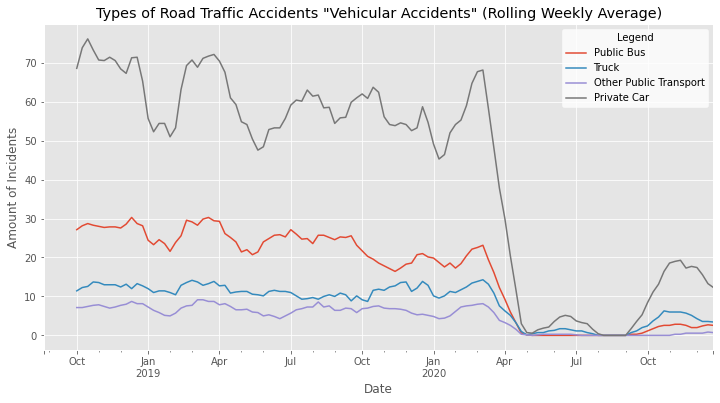

In [31]:
df_type = df
df_type = df_type.dropna()

def subset_vehicular_bus(row):
    if ('BUS' in row['Involved']) and ('VEHICULAR' in row['Type']):
        return True

def subset_vehicular_truck(row):
    if ('TRUCK' in row['Involved']) and ('VEHICULAR' in row['Type']):
        return True
    
def subset_vehicular_car(row):
    if (('CAR' in row['Involved']) or ('SUV' in row['Type'])) and ('VEHICULAR' in row['Type']):
        return True
    
def subset_vehicular_public(row):
    if (('PUJ' in row['Involved']) or ('UV' in row['Type'])) and ('VEHICULAR' in row['Type']):
        return True


df_type['type_bus'] = df_type.apply(lambda row: subset_vehicular_bus(row),axis=1)
df_type['type_truck'] = df_type.apply(lambda row: subset_vehicular_truck(row),axis=1)
df_type['type_public'] = df_type.apply(lambda row: subset_vehicular_public(row),axis=1)
df_type['type_car'] = df_type.apply(lambda row: subset_vehicular_car(row),axis=1)


df_type_participant = df_type[['Timestamp','type_bus','type_truck','type_public','type_car']]
df_type_participant.groupby(pd.Grouper(key='Timestamp', freq="W")).sum().rolling(7).mean().plot()


L = plt.legend(frameon=True)
L.set_title('Legend')
frame = L.get_frame()
frame.set_color('white')
L.get_texts()[0].set_text('Public Bus')
L.get_texts()[1].set_text('Truck')
L.get_texts()[2].set_text('Other Public Transport')
L.get_texts()[3].set_text('Private Car')


plt.xlabel('Date')
plt.ylabel('Amount of Incidents')
plt.title('Types of Road Traffic Accidents "Vehicular Accidents" (Rolling Weekly Average)')

C:\Users\User\AppData\Local\Temp\ipykernel_7404\3778286307.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type['type_bus'] = df_type.apply(lambda row: subset_mechanical_bus(row),axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_7404\3778286307.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type['type_truck'] = df_type.apply(lambda row: subset_mechanical_truck(row),axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_7404\3778286307.py:23: SettingWithCopyWarning: 
A value is trying to be set

Text(0.5, 1.0, 'Types of Road Traffic Accidents "Mechanical Problem" (Rolling Weekly Average)')

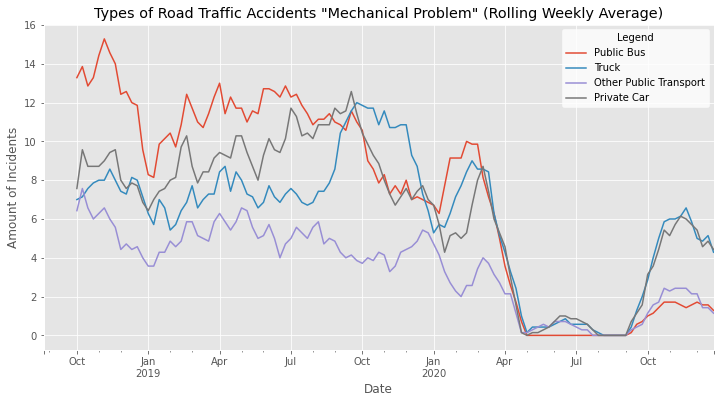

In [30]:
df_type = df
df_type = df_type.dropna()

def subset_mechanical_bus(row):
    if ('BUS' in row['Involved']) and ('MECHANICAL' in row['Type']):
        return True

def subset_mechanical_truck(row):
    if ('TRUCK' in row['Involved']) and ('MECHANICAL' in row['Type']):
        return True
    
def subset_mechanical_car(row):
    if (('CAR' in row['Involved']) or ('SUV' in row['Type'])) and ('MECHANICAL' in row['Type']):
        return True
    
def subset_mechanical_public(row):
    if (('PUJ' in row['Involved']) or ('UV' in row['Type'])) and ('MECHANICAL' in row['Type']):
        return True


df_type['type_bus'] = df_type.apply(lambda row: subset_mechanical_bus(row),axis=1)
df_type['type_truck'] = df_type.apply(lambda row: subset_mechanical_truck(row),axis=1)
df_type['type_public'] = df_type.apply(lambda row: subset_mechanical_public(row),axis=1)
df_type['type_car'] = df_type.apply(lambda row: subset_mechanical_car(row),axis=1)


df_type_participant = df_type[['Timestamp','type_bus','type_truck','type_public','type_car']]
df_type_participant.groupby(pd.Grouper(key='Timestamp', freq="W")).sum().rolling(7).mean().plot()


L = plt.legend(frameon=True)
L.set_title('Legend')
frame = L.get_frame()
frame.set_color('white')
L.get_texts()[0].set_text('Public Bus')
L.get_texts()[1].set_text('Truck')
L.get_texts()[2].set_text('Other Public Transport')
L.get_texts()[3].set_text('Private Car')


plt.xlabel('Date')
plt.ylabel('Amount of Incidents')
plt.title('Types of Road Traffic Accidents "Mechanical Problem" (Rolling Weekly Average)')

C:\Users\User\AppData\Local\Temp\ipykernel_7404\347840545.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type['type_bus'] = df_type.apply(lambda row: subset_selfaccident_bus(row),axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_7404\347840545.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type['type_truck'] = df_type.apply(lambda row: subset_selfaccident_truck(row),axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_7404\347840545.py:23: SettingWithCopyWarning: 
A value is trying to be se

Text(0.5, 1.0, 'Types of Road Traffic Accidents "Self Accident" (Rolling Weekly Average)')

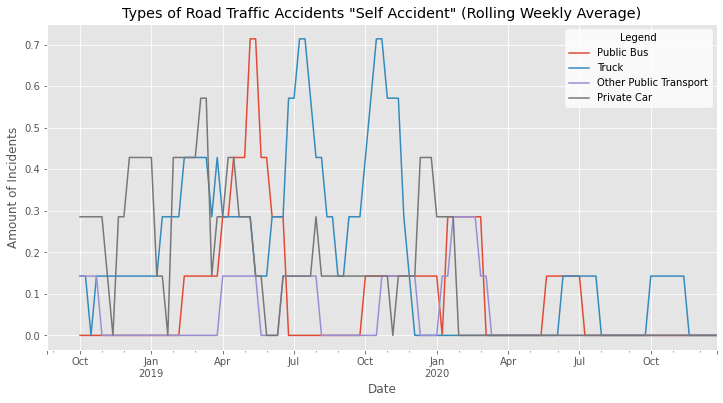

In [28]:
df_type = df
df_type = df_type.dropna()

def subset_selfaccident_bus(row):
    if ('BUS' in row['Involved']) and ('SELF ACCIDENT' in row['Type']):
        return True

def subset_selfaccident_truck(row):
    if ('TRUCK' in row['Involved']) and ('SELF ACCIDENT' in row['Type']):
        return True
    
def subset_selfaccident_car(row):
    if (('CAR' in row['Involved']) or ('SUV' in row['Type'])) and ('SELF ACCIDENT' in row['Type']):
        return True
    
def subset_selfaccident_public(row):
    if (('PUJ' in row['Involved']) or ('UV' in row['Type'])) and ('SELF ACCIDENT' in row['Type']):
        return True


df_type['type_bus'] = df_type.apply(lambda row: subset_selfaccident_bus(row),axis=1)
df_type['type_truck'] = df_type.apply(lambda row: subset_selfaccident_truck(row),axis=1)
df_type['type_public'] = df_type.apply(lambda row: subset_selfaccident_public(row),axis=1)
df_type['type_car'] = df_type.apply(lambda row: subset_selfaccident_car(row),axis=1)


df_type_participant = df_type[['Timestamp','type_bus','type_truck','type_public','type_car']]
df_type_participant.groupby(pd.Grouper(key='Timestamp', freq="W")).sum().rolling(7).mean().plot()


L = plt.legend(frameon=True)
L.set_title('Legend')
frame = L.get_frame()
frame.set_color('white')
L.get_texts()[0].set_text('Public Bus')
L.get_texts()[1].set_text('Truck')
L.get_texts()[2].set_text('Other Public Transport')
L.get_texts()[3].set_text('Private Car')


plt.xlabel('Date')
plt.ylabel('Amount of Incidents')
plt.title('Types of Road Traffic Accidents "Self Accident" (Rolling Weekly Average)')

C:\Users\User\AppData\Local\Temp\ipykernel_7404\3810686128.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type['type_bus'] = df_type.apply(lambda row: subset_hit_bus(row),axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_7404\3810686128.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type['type_truck'] = df_type.apply(lambda row: subset_hit_truck(row),axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_7404\3810686128.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

Text(0.5, 1.0, 'Types of Road Traffic Accidents "Hit and Run" (Rolling Weekly Average)')

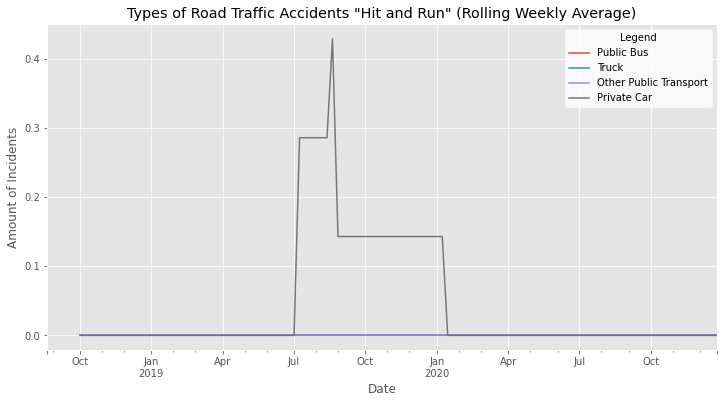

In [29]:
df_type = df
df_type = df_type.dropna()

def subset_hit_bus(row):
    if ('BUS' in row['Involved']) and ('HIT AND RUN' in row['Type']):
        return True

def subset_hit_truck(row):
    if ('TRUCK' in row['Involved']) and ('HIT AND RUN' in row['Type']):
        return True
    
def subset_hit_car(row):
    if (('CAR' in row['Involved']) or ('SUV' in row['Type'])) and ('HIT AND RUN' in row['Type']):
        return True
    
def subset_hit_public(row):
    if (('PUJ' in row['Involved']) or ('UV' in row['Type'])) and ('HIT AND RUN' in row['Type']):
        return True


df_type['type_bus'] = df_type.apply(lambda row: subset_hit_bus(row),axis=1)
df_type['type_truck'] = df_type.apply(lambda row: subset_hit_truck(row),axis=1)
df_type['type_public'] = df_type.apply(lambda row: subset_hit_public(row),axis=1)
df_type['type_car'] = df_type.apply(lambda row: subset_hit_car(row),axis=1)


df_type_participant = df_type[['Timestamp','type_bus','type_truck','type_public','type_car']]
df_type_participant.groupby(pd.Grouper(key='Timestamp', freq="W")).sum().rolling(7).mean().plot()


L = plt.legend(frameon=True)
L.set_title('Legend')
frame = L.get_frame()
frame.set_color('white')
L.get_texts()[0].set_text('Public Bus')
L.get_texts()[1].set_text('Truck')
L.get_texts()[2].set_text('Other Public Transport')
L.get_texts()[3].set_text('Private Car')


plt.xlabel('Date')
plt.ylabel('Amount of Incidents')
plt.title('Types of Road Traffic Accidents "Hit and Run" (Rolling Weekly Average)')